![](http://observatoriooceanografico.org/wp-content/uploads/elementor/thumbs/logo-o2-2-p31vla9ib17i85olifd4l1xk0e5lktrkal6u0s4c6o.png)<br>
# Notebook no Python para resolver o problema do Reator Fechado<br>

Criado por [A.L. Belém](mailto:andrebelem@id.uff.br) @ [Observatório Oceanográfico](http://www.observatoiriooceanografico.uff.br) 2021 (versão 1) para disciplina de **Modelagem e Otimização de Sistemas Agrícolas e Ambientais**<br>
<br>
   Pra você usar o Python para resolver o problema do reator fechado, você vai precisar de 3 bilbiotecas: a numpy para contas, a matplotlib para fazer as figuras e a scipy para o solver das equações diferenciais. Caso você não tenha alguma, instale externamente com o pip3, por exemplo: <br>
   <code> pip3 install scipy</code><br>
   Esse comando é executado na sua janela de comando e não aqui de dentro.
   

In [6]:
# Importa os módulos necessários
import numpy as np
import matplotlib.pyplot as plt
# Isso faz com que os gráficos apareçam dentro do notebook
%matplotlib inline

In [9]:
from scipy.integrate import odeint

# Defina uma função que calcula a derivada
def dx_dt(x, t):
    # por exemplo, suponhamos que o crescimento seja exponencial
    # dado pela taxa de crescimento kg_max (em dias-1)
    kg_max = 0.2
    return x * kg_max

# aqui você define o tempo inicial e o tempo final, e o delta_t (inicial - final)/número de passos
ts = np.linspace(0,10,100)

x0 = 1.0  # esta é a condição inicial
xs = odeint(dx_dt, x0, ts)
xs = np.array(xs).flatten() # essa rotina é usada para "achatar" a variável X já que odeint vai retornar (100,1) valores

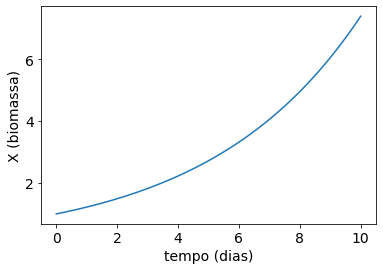

In [10]:
# Aqui vamos plotar a solução numérica
plt.rcParams.update({'font.size': 14})  # aumenta um pouco o tamanho da letra
plt.xlabel("tempo (dias)")
plt.ylabel("X (biomassa)")
plt.plot(ts, xs);

Note que o exemplo acima assume apenas o crescimento exponencial, onde:<br>
$\Large\frac{dx}{dt} = k_{g_{max}} . x$<br>
<br>
Agora vamos assumir que você tem duas equações, como descrito em aula para o reator fechado<br>
<br>
$\Large\frac{dx}{dt} = \left(k_{g_{max}}\frac{S}{k_s + S} - k_d - k_r\right)x$<br>
$\Large\frac{dS}{dt} = \left(-\frac{1}{Y}k_{g_{max}} . \frac{S}{k_s + S} + k_d\right)x$<br>
<br>
Neste caso, X é um vetor de 2 posições onde X(0) é o $x$ da nossa equação e X(1) é o $S$ da nossa equação. **SIM!** o Python assume a posição inicial de um vetor como 0 (zero), ou seja, $x = [99, 98, 87]$, $x(0) = 99$, $x(1) = 98$, e assim por diante, e isso é **diferente** no Octave, no matlab e no fortran, onde a posição inicial do vetor é 1 (um). Os outros parâmetros são definidos dentro da função:<br>




In [44]:
# Defina uma função que calcula a derivada
def dxS_dt(X, t):
    # definições dos parâmetros
    kg_max = 0.5 # taxa de crescimento (dia^-1)
    kd = 0.01 # taxa de mortalidade (dia^-1)
    kr = 0.01 # taxa de respiração (dia^-1)
    ks = 150 # coeficiente de meia-saturação de S
    Y = 0.5 # eficiência 
    
    # note que as equações vão diretamente no "return"
    return [(kg_max * (X[1]/(ks+X[1])) - kd - kr)*X[0],(((-1)/(Y)) * kg_max * (X[1]/(ks+X[1])) + kd)*X[0]]

# cautela !! a maneira como você escreve as equações dentro da função pode alterar o resultado

# aqui você define o tempo inicial e o tempo final, e o delta_t (inicial - final)/número de passos
ts = np.linspace(0,20,1000) # em dias

X0 = [2.0, 998.0]  # esta é a condição inicial
Xs = odeint(dxS_dt, X0, ts)
bacteria = Xs[:,0]
substrato = Xs[:,1]

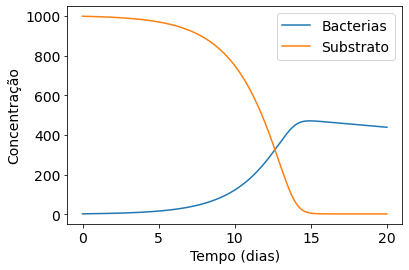

In [45]:
# agora plotamos as duas curvas
plt.plot(ts, bacteria, label="Bacterias")
plt.plot(ts, substrato, label="Substrato")
plt.xlabel("Tempo (dias)")
plt.ylabel("Concentração")
plt.legend();

Explore como os valores dos parêmtros irão afetar o gráfico. Você também pode explorar opções da função odeint aqui https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html prestando muito a atenção sobre o que é **STIFF** (rígido) e **NON-STIFF** (não-rígido). Se quiser pode também explorar mais formas de chamar a odeinte aqui https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations <br>
<br>
## Desafio:<br>
Escreva agora você um código para o reator aberto e envie para mim. (emailto:andrebelem@id.uff.br)
<br>
